In [1]:
# Import Libraries

import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\ML Module 2 Assign\day.csv")
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
# check columns present in dataset

df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
len(df.describe().columns)

15

In [6]:
df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [7]:
# check for null values

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# check for datatypes of columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
# drop instant column as it is an index column

df.drop(['instant'], axis=1, inplace=True)
df.head()

dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0  01-01-2018       1   0     1        0        1           1           2   
1  02-01-2018       1   0     1        0        2           1           2   
2  03-01-2018       1   0     1        0        3           1           1   
3  04-01-2018       1   0     1        0        4           1           1   
4  05-01-2018       1   0     1        0        5           1           1   

        temp     atemp      hum  windspeed  casual  registered   cnt  
0  14.110847  18.18125  80.5833  10.749882     331         654   985  
1  14.902598  17.68695  69.6087  16.652113     131         670   801  
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349  
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562  
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600

In [10]:
# we see that column dteday, yr and month are having same data so we can drop dteday to avoid confusion

df.drop(['dteday'], axis=1, inplace=True)
df.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  
0  18.18125  80.5833  10.749882     331         654   985  
1  17.68695  69.6087  16.652113     131         670   801  
2   9.47025  43.7273  16.636703     120        1229  1349  
3  10.60610  59.0435  10.739832     108        1454  1562  
4  11.46350  43.6957  12.522300      82        1518  1600

In [11]:
# we can see that casual+registered=cnt and cnt is our target variable so we will not consider casual and registered columns

df.drop(['casual', 'registered'], axis=1, inplace=True)
df.head()


season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [12]:
# check datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [13]:
#from data we can see that: season,yr,mnth,holiday,weekday,workingday,weathersit all are categorical variables
#We will replace season,weathersit and weekday with appropriate values

df['season'].replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace=True)
df.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0  spring   0     1        0        1           1           2  14.110847   
1  spring   0     1        0        2           1           2  14.902598   
2  spring   0     1        0        3           1           1   8.050924   
3  spring   0     1        0        4           1           1   8.200000   
4  spring   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [14]:
df['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
df.head()

season  yr  mnth  holiday  weekday  workingday        weathersit  \
0  spring   0     1        0        1           1       Mist_cloudy   
1  spring   0     1        0        2           1       Mist_cloudy   
2  spring   0     1        0        3           1  Clear_Few Clouds   
3  spring   0     1        0        4           1  Clear_Few Clouds   
4  spring   0     1        0        5           1  Clear_Few Clouds   

        temp     atemp      hum  windspeed   cnt  
0  14.110847  18.18125  80.5833  10.749882   985  
1  14.902598  17.68695  69.6087  16.652113   801  
2   8.050924   9.47025  43.7273  16.636703  1349  
3   8.200000  10.60610  59.0435  10.739832  1562  
4   9.305237  11.46350  43.6957  12.522300  1600

In [15]:
df['weekday'].replace({0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"}, inplace=True)
df.head(10)

season  yr  mnth  holiday    weekday  workingday        weathersit  \
0  spring   0     1        0     Monday           1       Mist_cloudy   
1  spring   0     1        0    Tuesday           1       Mist_cloudy   
2  spring   0     1        0  Wednesday           1  Clear_Few Clouds   
3  spring   0     1        0   Thursday           1  Clear_Few Clouds   
4  spring   0     1        0     Friday           1  Clear_Few Clouds   
5  spring   0     1        0   Saturday           0  Clear_Few Clouds   
6  spring   0     1        0     Sunday           0       Mist_cloudy   
7  spring   0     1        0     Monday           1       Mist_cloudy   
8  spring   0     1        0    Tuesday           1  Clear_Few Clouds   
9  spring   0     1        0  Wednesday           1  Clear_Few Clouds   

        temp     atemp      hum  windspeed   cnt  
0  14.110847  18.18125  80.5833  10.749882   985  
1  14.902598  17.68695  69.6087  16.652113   801  
2   8.050924   9.47025  43.7273  16.636703  1349  
3   8.200000  10.60610  59.0435  10.739832  1562  
4   9.305237  11.46350  43.6957  12.522300  1600  
5   8.378268  11.66045  51.8261   6.000868  1606  
6   8.057402  10.44195  49.8696  11.304642  1510  
7   6.765000   8.11270  53.5833  17.875868   959  
8   5.671653   5.80875  43.4167  24.250650   822  
9   6.184153   7.54440  48.2917  14.958889  1321

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


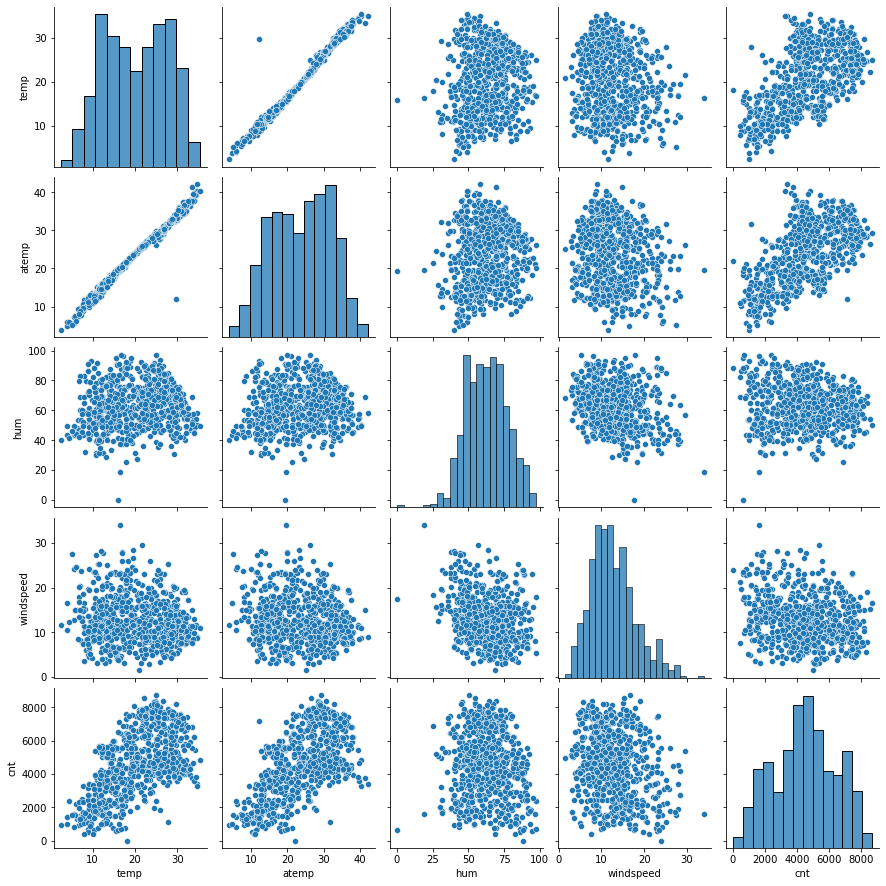

In [17]:
# plot a pairplot to understand the numeric variables

sns.pairplot(df, vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

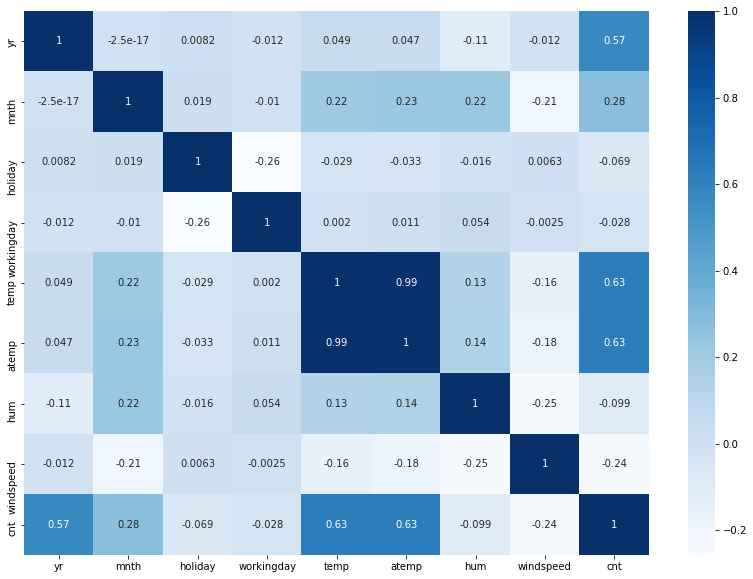

In [18]:
# we can see that temp and atemp have a relationship

plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

In [19]:
# correlation between temp and atemp is 0.99(almost 1)
# lets drop temp
df.drop(['temp'], axis=1, inplace=True)
df.head()

season  yr  mnth  holiday    weekday  workingday        weathersit  \
0  spring   0     1        0     Monday           1       Mist_cloudy   
1  spring   0     1        0    Tuesday           1       Mist_cloudy   
2  spring   0     1        0  Wednesday           1  Clear_Few Clouds   
3  spring   0     1        0   Thursday           1  Clear_Few Clouds   
4  spring   0     1        0     Friday           1  Clear_Few Clouds   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

## Visualising Categorical Variables

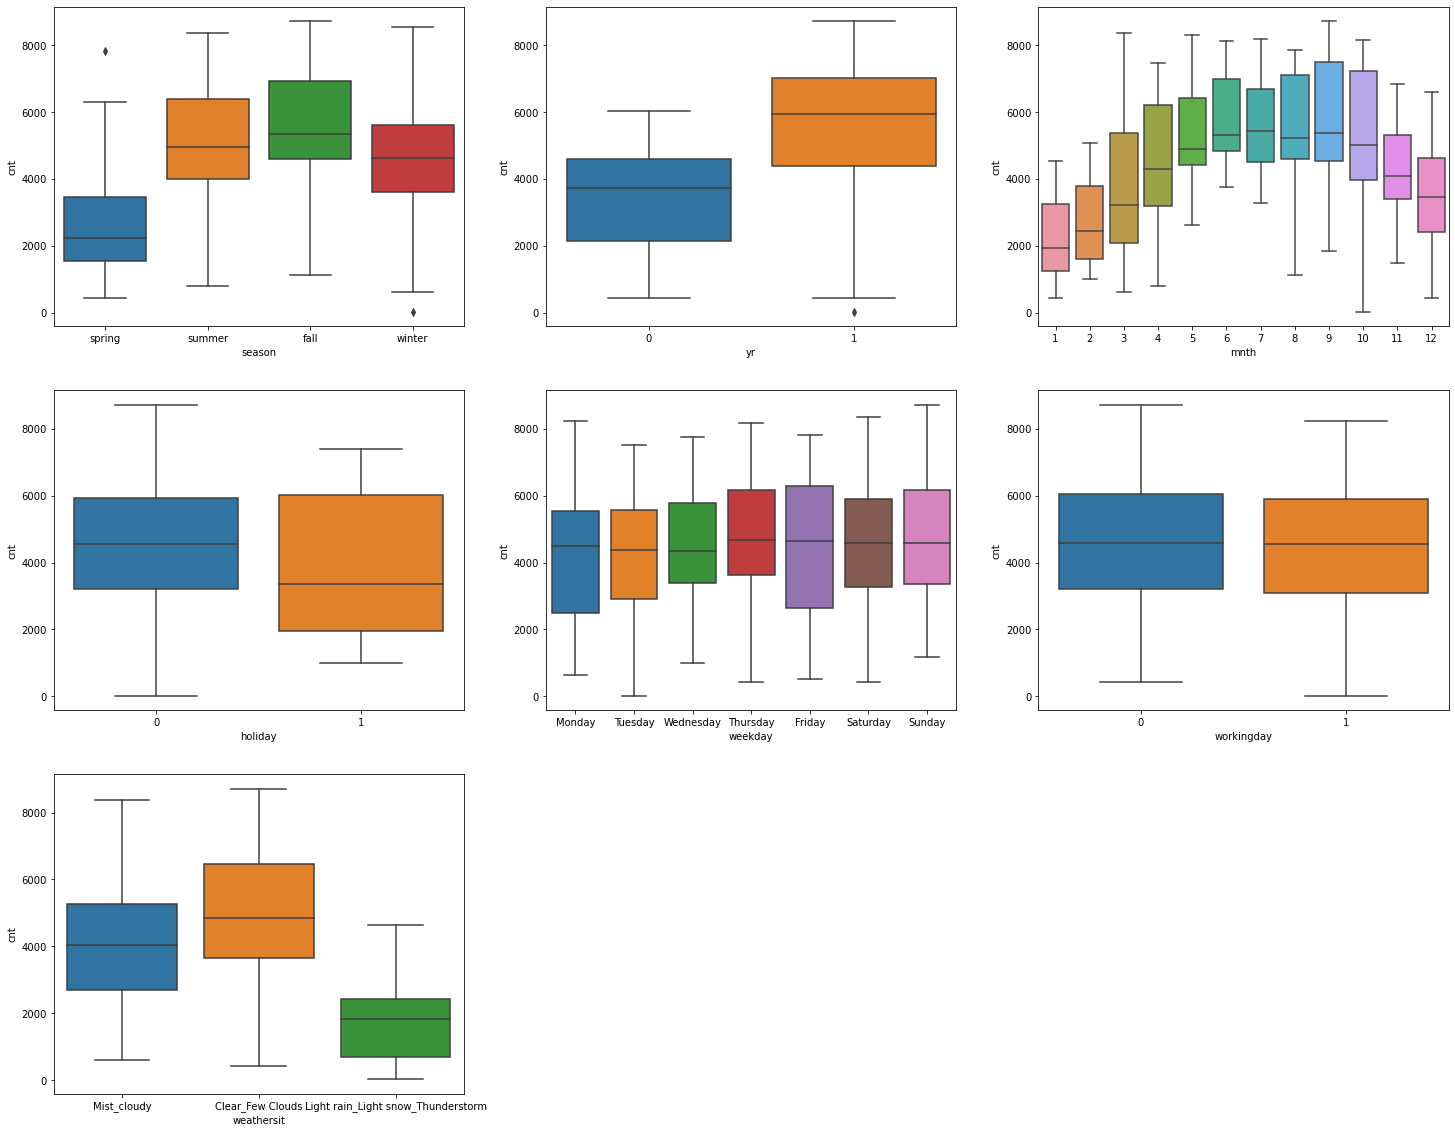

In [20]:
plt.figure(figsize=(25,20))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=df)
plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt', data=df)
plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data=df)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.show()

## Creating Dummy Variables

In [21]:
#Convert variables to object type
df['mnth']=df['mnth'].astype(object)
df['season']=df['season'].astype(object)
df['weathersit']=df['weathersit'].astype(object)
df['weekday']=df['weekday'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [22]:
#CREATING DUMMY VARIABLES FOR CATEGORICAL DATA 

Season_condition=pd.get_dummies(df['season'],drop_first=True)
Weather_condition=pd.get_dummies(df['weathersit'],drop_first=True)
Day_of_week=pd.get_dummies(df['weekday'],drop_first=True)
Month=pd.get_dummies(df['mnth'],drop_first=True)

In [23]:
df=pd.concat([df,Season_condition],axis=1)
df=pd.concat([df,Weather_condition],axis=1)
df=pd.concat([df,Day_of_week],axis=1)
df=pd.concat([df,Month],axis=1)


In [24]:
#Deleting the orginal columns season.weathersit,weekday,mnth
df.drop(['season'],axis=1,inplace=True)
df.drop(['weathersit'],axis=1,inplace=True)

df.drop(['weekday'],axis=1,inplace=True)

df.drop(['mnth'],axis=1,inplace=True)


df.head()

yr  holiday  workingday     atemp      hum  windspeed   cnt  spring  \
0   0        0           1  18.18125  80.5833  10.749882   985       1   
1   0        0           1  17.68695  69.6087  16.652113   801       1   
2   0        0           1   9.47025  43.7273  16.636703  1349       1   
3   0        0           1  10.60610  59.0435  10.739832  1562       1   
4   0        0           1  11.46350  43.6957  12.522300  1600       1   

   summer  winter  ...  3  4  5  6  7  8  9  10  11  12  
0       0       0  ...  0  0  0  0  0  0  0   0   0   0  
1       0       0  ...  0  0  0  0  0  0  0   0   0   0  
2       0       0  ...  0  0  0  0  0  0  0   0   0   0  
3       0       0  ...  0  0  0  0  0  0  0   0   0   0  
4       0       0  ...  0  0  0  0  0  0  0   0   0   0  

[5 rows x 29 columns]

In [25]:
#Now are data is ready to split
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [26]:
df_train.head()


yr  holiday  workingday    atemp      hum  windspeed   cnt  spring  \
653   1        0           1  23.0423  55.8333  12.208807  7534       0   
576   1        0           1  33.1448  70.4167  11.083475  7216       0   
426   1        0           0  20.6746  62.1250  10.792293  4066       1   
728   1        0           1  11.5850  48.3333  23.500518  1796       1   
482   1        0           0  18.8752  48.9583   8.708325  4220       0   

     summer  winter  ...  3  4  5  6  7  8  9  10  11  12  
653       0       1  ...  0  0  0  0  0  0  0   1   0   0  
576       0       0  ...  0  0  0  0  1  0  0   0   0   0  
426       0       0  ...  1  0  0  0  0  0  0   0   0   0  
728       0       0  ...  0  0  0  0  0  0  0   0   0   1  
482       1       0  ...  0  1  0  0  0  0  0   0   0   0  

[5 rows x 29 columns]

In [27]:
df_test.head()

yr  holiday  workingday     atemp      hum  windspeed   cnt  spring  \
184   0        1           0  33.27085  63.7917   5.459106  6043       0   
535   1        0           1  36.04875  59.2083   7.625404  6211       0   
299   0        0           0  22.85230  81.2917  13.250121  2659       0   
221   0        0           1  34.24915  42.4167  13.417286  4780       0   
152   0        0           0  32.19710  30.5000  19.583229  4968       0   

     summer  winter  ...  3  4  5  6  7  8  9  10  11  12  
184       0       0  ...  0  0  0  0  1  0  0   0   0   0  
535       1       0  ...  0  0  0  1  0  0  0   0   0   0  
299       0       1  ...  0  0  0  0  0  0  0   1   0   0  
221       0       0  ...  0  0  0  0  0  1  0   0   0   0  
152       1       0  ...  0  0  0  1  0  0  0   0   0   0  

[5 rows x 29 columns]

In [28]:
df_train.columns

Index([                                'yr',
                                  'holiday',
                               'workingday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                      'cnt',
                                   'spring',
                                   'summer',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                   'Monday',
                                 'Saturday',
                                   'Sunday',
                                 'Thursday',
                                  'Tuesday',
                                'Wednesday',
                                          2,
                                          3,
                                          4,
                                          5,
          

In [29]:
#SCALING THE NUMERICAL DATA
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [30]:
num_vars=['atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [31]:
df_train.head()

yr  holiday  workingday     atemp       hum  windspeed       cnt  spring  \
653   1        0           1  0.501133  0.575354   0.300794  0.864243       0   
576   1        0           1  0.766351  0.725633   0.264686  0.827658       0   
426   1        0           0  0.438975  0.640189   0.255342  0.465255       1   
728   1        0           1  0.200348  0.498067   0.663106  0.204096       1   
482   1        0           0  0.391735  0.504508   0.188475  0.482973       0   

     summer  winter  ...  3  4  5  6  7  8  9  10  11  12  
653       0       1  ...  0  0  0  0  0  0  0   1   0   0  
576       0       0  ...  0  0  0  0  1  0  0   0   0   0  
426       0       0  ...  1  0  0  0  0  0  0   0   0   0  
728       0       0  ...  0  0  0  0  0  0  0   0   0   1  
482       1       0  ...  0  1  0  0  0  0  0   0   0   0  

[5 rows x 29 columns]

In [32]:
df_train.describe()

yr     holiday  workingday       atemp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.711765    0.512989    0.650369    0.320768   
std      0.500429    0.157763    0.453386    0.212385    0.145882    0.169797   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.332086    0.538643    0.199179   
50%      1.000000    0.000000    1.000000    0.526811    0.653714    0.296763   
75%      1.000000    0.000000    1.000000    0.688457    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt      spring      summer     winter  ...           3  \
count  510.000000  510.000000  510.000000  510.00000  ...  510.000000   
mean     0.513620    0.243137    0.245098    0.24902  ...    0.098039   
std      0.224593    0.429398    0.430568    0.43287  ...    0.297660   
min      0.000000    0.000000    0.000000    0.00000  ...    0.000000   
25%      0.356420    0.000000    0.000000    0.00000  ...    0.000000   
50%      0.518638    0.000000    0.000000    0.00000  ...    0.000000   
75%      0.684710    0.000000    0.000000    0.00000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.00000  ...    1.000000   

                4           5           6           7           8           9  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.078431    0.084314    0.074510    0.076471    0.096078    0.080392   
std      0.269113    0.278131    0.262857    0.266010    0.294988    0.272166   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               10          11          12  
count  510.000000  510.000000  510.000000  
mean     0.086275    0.086275    0.084314  
std      0.281045    0.281045    0.278131  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 29 columns]

In [33]:
#CREATING X AND Y
y_train = df_train.pop('cnt')
X_train = df_train

In [34]:
X_train.head()

yr  holiday  workingday     atemp       hum  windspeed  spring  summer  \
653   1        0           1  0.501133  0.575354   0.300794       0       0   
576   1        0           1  0.766351  0.725633   0.264686       0       0   
426   1        0           0  0.438975  0.640189   0.255342       1       0   
728   1        0           1  0.200348  0.498067   0.663106       1       0   
482   1        0           0  0.391735  0.504508   0.188475       0       1   

     winter  Light rain_Light snow_Thunderstorm  ...  3  4  5  6  7  8  9  10  \
653       1                                   0  ...  0  0  0  0  0  0  0   1   
576       0                                   0  ...  0  0  0  0  1  0  0   0   
426       0                                   0  ...  1  0  0  0  0  0  0   0   
728       0                                   0  ...  0  0  0  0  0  0  0   0   
482       0                                   0  ...  0  1  0  0  0  0  0   0   

     11  12  
653   0   0  
576   0   0  
426   0   0  
728   0   1  
482   0   0  

[5 rows x 28 columns]

In [35]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [37]:
#USING RFE APPROACH FOR FEATURE SELECTION WE START WITH 15 VARS AND WILL USE MIXED APPROACH TO BUILD A MODEL

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudy', True, 1),
 ('Monday', False, 10),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 14),
 ('Tuesday', False, 9),
 ('Wednesday', False, 13),
 (2, False, 8),
 (3, True, 1),
 (4, True, 1),
 (5, True, 1),
 (6, True, 1),
 (7, False, 7),
 (8, True, 1),
 (9, True, 1),
 (10, False, 2),
 (11, False, 11),
 (12, False, 12)]

In [39]:
col = X_train.columns[rfe.support_]
col

Index([                                'yr',
                                  'holiday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                   'spring',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          4,
                                          5,
                                          6,
                                          8,
                                          9],
      dtype='object')

In [40]:
X_train.columns[~rfe.support_]

Index(['workingday',     'summer',     'Monday',   'Saturday',     'Sunday',
         'Thursday',    'Tuesday',  'Wednesday',            2,            7,
                 10,           11,           12],
      dtype='object')

In [41]:
X_train_rfe = X_train[col]

In [42]:
#BUILDING MODEL USING STATSMODEL:

import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [43]:
lm = sm.OLS(y_train,X_train_rfe1).fit()

In [44]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.6
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          8.06e-186
Time:                        12:09:24   Log-Likelihood:                 506.64
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     494   BIC:                            -913.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2995      0.034      8.909      0.000       0.233       0.366
yr                                     0.2320      0.008     28.268      0.000       0.216       0.248
holiday                               -0.0845      0.026     -3.266      0.001      -0.135      -0.034
atemp                                  0.4597      0.033     13.757      0.000       0.394       0.525
hum                                   -0.1599      0.038     -4.156      0.000      -0.236      -0.084
windspeed                             -0.1613      0.026     -6.170      0.000      -0.213      -0.110
spring                                -0.0757      0.019     -4.061      0.000      -0.112      -0.039
winter                                 0.1024      0.016      6.301      0.000       0.070       0.134
Light rain_Light snow_Thunderstorm    -0.2359      0.027     -8.833      0.000      -0.288      -0.183
Mist_cloudy                           -0.0568      0.011     -5.347      0.000      -0.078      -0.036
3                                      0.0585      0.015      3.852      0.000       0.029       0.088
4                                      0.0591      0.020      2.948      0.003       0.020       0.099
5                                      0.0922      0.019      4.906      0.000       0.055       0.129
6                                      0.0583      0.019      3.017      0.003       0.020       0.096
8                                      0.0608      0.018      3.362      0.001       0.025       0.096
9                                      0.1175      0.017      6.719      0.000       0.083       0.152
==============================================================================
Omnibus:                       60.719   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.007
Skew:                          -0.591   Prob(JB):                     6.62e-36
Kurtosis:                       5.496   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                                  hum  25.72
2                                atemp  15.52
4                            windspeed   4.56
5                               spring   3.52
6                               winter   3.21
8                          Mist_cloudy   2.26
0                                   yr   2.08
13                                   8   1.90
11                                   5   1.77
10                                   4   1.68
12                                   6   1.65
14                                   9   1.50
9                                    3   1.36
7   Light rain_Light snow_Thunderstorm   1.24
1                              holiday   1.05

In [46]:
X_train_rfe1.head()

const  yr  holiday     atemp       hum  windspeed  spring  winter  \
653    1.0   1        0  0.501133  0.575354   0.300794       0       1   
576    1.0   1        0  0.766351  0.725633   0.264686       0       0   
426    1.0   1        0  0.438975  0.640189   0.255342       1       0   
728    1.0   1        0  0.200348  0.498067   0.663106       1       0   
482    1.0   1        0  0.391735  0.504508   0.188475       0       0   

     Light rain_Light snow_Thunderstorm  Mist_cloudy  3  4  5  6  8  9  
653                                   0            0  0  0  0  0  0  0  
576                                   0            0  0  0  0  0  0  0  
426                                   0            1  1  0  0  0  0  0  
728                                   0            0  0  0  0  0  0  0  
482                                   0            1  0  1  0  0  0  0

In [47]:
#COLUMN hum HAS A VERY HIGH VIF SO WE DROP IT 

X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [48]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [49]:
lm1 = sm.OLS(y_train,X_train_rfe1).fit()

In [50]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.8
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.75e-183
Time:                        12:09:25   Log-Likelihood:                 497.88
No. Observations:                 510   AIC:                            -965.8
Df Residuals:                     495   BIC:                            -902.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2151      0.027      7.900      0.000       0.162       0.269
yr                                     0.2355      0.008     28.377      0.000       0.219       0.252
holiday                               -0.0854      0.026     -3.248      0.001      -0.137      -0.034
atemp                                  0.4298      0.033     12.960      0.000       0.365       0.495
windspeed                             -0.1332      0.026     -5.189      0.000      -0.184      -0.083
spring                                -0.0815      0.019     -4.310      0.000      -0.119      -0.044
winter                                 0.0911      0.016      5.597      0.000       0.059       0.123
Light rain_Light snow_Thunderstorm    -0.2799      0.025    -11.234      0.000      -0.329      -0.231
Mist_cloudy                           -0.0820      0.009     -9.252      0.000      -0.099      -0.065
3                                      0.0597      0.015      3.871      0.000       0.029       0.090
4                                      0.0597      0.020      2.930      0.004       0.020       0.100
5                                      0.0817      0.019      4.316      0.000       0.045       0.119
6                                      0.0628      0.020      3.199      0.001       0.024       0.101
8                                      0.0594      0.018      3.235      0.001       0.023       0.096
9                                      0.1118      0.018      6.311      0.000       0.077       0.147
==============================================================================
Omnibus:                       61.552   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.196
Skew:                          -0.618   Prob(JB):                     1.99e-34
Kurtosis:                       5.404   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                                atemp  6.26
3                            windspeed  4.56
4                               spring  2.10
0                                   yr  2.08
5                               winter  1.97
12                                   8  1.86
11                                   6  1.64
10                                   5  1.60
7                          Mist_cloudy  1.55
9                                    4  1.54
13                                   9  1.45
8                                    3  1.35
6   Light rain_Light snow_Thunderstorm  1.08
1                              holiday  1.05

In [52]:
#COLUMN temp HAS A VERY HIGH VIF SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['atemp'],axis=1)

In [53]:
X_train_rfe2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     134.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.90e-153
Time:                        12:09:25   Log-Likelihood:                 423.38
No. Observations:                 510   AIC:                            -818.8
Df Residuals:                     496   BIC:                            -759.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.5082      0.018     28.983      0.000       0.474       0.543
yr                                     0.2479      0.010     26.013      0.000       0.229       0.267
holiday                               -0.0886      0.030     -2.916      0.004      -0.148      -0.029
windspeed                             -0.1645      0.030     -5.566      0.000      -0.223      -0.106
spring                                -0.2392      0.017    -14.308      0.000      -0.272      -0.206
winter                                -0.0080      0.017     -0.482      0.630      -0.041       0.025
Light rain_Light snow_Thunderstorm    -0.2896      0.029    -10.056      0.000      -0.346      -0.233
Mist_cloudy                           -0.0943      0.010     -9.257      0.000      -0.114      -0.074
3                                      0.0494      0.018      2.772      0.006       0.014       0.084
4                                     -0.0153      0.023     -0.676      0.499      -0.060       0.029
5                                      0.0671      0.022      3.072      0.002       0.024       0.110
6                                      0.0901      0.023      3.995      0.000       0.046       0.134
8                                      0.0929      0.021      4.418      0.000       0.052       0.134
9                                      0.1318      0.020      6.456      0.000       0.092       0.172
==============================================================================
Omnibus:                       35.107   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.924
Skew:                          -0.372   Prob(JB):                     7.28e-18
Kurtosis:                       4.777   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                            windspeed  3.95
3                               spring  2.10
0                                   yr  1.90
4                               winter  1.80
6                          Mist_cloudy  1.54
8                                    4  1.48
9                                    5  1.32
7                                    3  1.31
11                                   8  1.31
10                                   6  1.24
12                                   9  1.17
5   Light rain_Light snow_Thunderstorm  1.08
1                              holiday  1.05

In [55]:
X_train_rfe.columns


Index([                                'yr',
                                  'holiday',
                                'windspeed',
                                   'spring',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          4,
                                          5,
                                          6,
                                          8,
                                          9],
      dtype='object')

In [56]:
#Windspeed has high VIF >2 so we drop it
X_train_rfe=X_train_rfe.drop(['windspeed'],axis=1)

In [57]:
X_train_rfe3 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     134.9
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          9.96e-148
Time:                        12:09:26   Log-Likelihood:                 407.93
No. Observations:                 510   AIC:                            -789.9
Df Residuals:                     497   BIC:                            -734.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4616      0.016     29.102      0.000       0.430       0.493
yr                                     0.2478      0.010     25.245      0.000       0.228       0.267
holiday                               -0.0918      0.031     -2.935      0.003      -0.153      -0.030
spring                                -0.2516      0.017    -14.740      0.000      -0.285      -0.218
winter                                -0.0093      0.017     -0.544      0.587      -0.043       0.024
Light rain_Light snow_Thunderstorm    -0.3052      0.030    -10.342      0.000      -0.363      -0.247
Mist_cloudy                           -0.0934      0.010     -8.907      0.000      -0.114      -0.073
3                                      0.0395      0.018      2.166      0.031       0.004       0.075
4                                     -0.0386      0.023     -1.691      0.092      -0.084       0.006
5                                      0.0638      0.022      2.838      0.005       0.020       0.108
6                                      0.0874      0.023      3.763      0.000       0.042       0.133
8                                      0.0961      0.022      4.439      0.000       0.054       0.139
9                                      0.1381      0.021      6.580      0.000       0.097       0.179
==============================================================================
Omnibus:                       43.939   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.742
Skew:                          -0.401   Prob(JB):                     3.67e-27
Kurtosis:                       5.255   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
#Winter has A VERY HIGH p-value WHUCH MEANS IT IS insignificant SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['winter'],axis=1)

In [59]:
X_train_rfe4 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     147.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          9.28e-149
Time:                        12:09:26   Log-Likelihood:                 407.78
No. Observations:                 510   AIC:                            -791.6
Df Residuals:                     498   BIC:                            -740.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4552      0.011     42.608      0.000       0.434       0.476
yr                                     0.2478      0.010     25.263      0.000       0.228       0.267
holiday                               -0.0924      0.031     -2.956      0.003      -0.154      -0.031
spring                                -0.2457      0.013    -18.510      0.000      -0.272      -0.220
Light rain_Light snow_Thunderstorm    -0.3060      0.029    -10.389      0.000      -0.364      -0.248
Mist_cloudy                           -0.0938      0.010     -8.976      0.000      -0.114      -0.073
3                                      0.0423      0.017      2.421      0.016       0.008       0.077
4                                     -0.0321      0.019     -1.653      0.099      -0.070       0.006
5                                      0.0704      0.019      3.711      0.000       0.033       0.108
6                                      0.0938      0.020      4.703      0.000       0.055       0.133
8                                      0.1026      0.018      5.698      0.000       0.067       0.138
9                                      0.1426      0.019      7.422      0.000       0.105       0.180
==============================================================================
Omnibus:                       44.016   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.952
Skew:                          -0.402   Prob(JB):                     3.30e-27
Kurtosis:                       5.257   Cond. No.                         8.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
#cOLUMN 4 HAS A VERY HIGH p-value WHUCH MEANS IT IS insignificant SO WE DROP IT
X_train_rfe=X_train_rfe.drop([4],axis=1)

In [61]:
X_train_rfe5 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe5).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.76e-149
Time:                        12:09:26   Log-Likelihood:                 406.38
No. Observations:                 510   AIC:                            -790.8
Df Residuals:                     499   BIC:                            -744.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4493      0.010     44.546      0.000       0.429       0.469
yr                                     0.2469      0.010     25.167      0.000       0.228       0.266
holiday                               -0.0916      0.031     -2.928      0.004      -0.153      -0.030
spring                                -0.2402      0.013    -18.666      0.000      -0.265      -0.215
Light rain_Light snow_Thunderstorm    -0.3039      0.029    -10.308      0.000      -0.362      -0.246
Mist_cloudy                           -0.0938      0.010     -8.956      0.000      -0.114      -0.073
3                                      0.0450      0.017      2.581      0.010       0.011       0.079
5                                      0.0767      0.019      4.119      0.000       0.040       0.113
6                                      0.1002      0.020      5.108      0.000       0.062       0.139
8                                      0.1090      0.018      6.186      0.000       0.074       0.144
9                                      0.1488      0.019      7.881      0.000       0.112       0.186
==============================================================================
Omnibus:                       40.875   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.374
Skew:                          -0.375   Prob(JB):                     1.08e-24
Kurtosis:                       5.152   Cond. No.                         8.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                  yr  1.51
2                              spring  1.39
4                         Mist_cloudy  1.36
5                                   3  1.22
8                                   8  1.12
6                                   5  1.10
9                                   9  1.10
7                                   6  1.06
1                             holiday  1.03
3  Light rain_Light snow_Thunderstorm  1.02

In [63]:
#ADDING SATURDAY AND CHECKING IF MODEL IMPROVES

X_train_rfe['Saturday']=X_train['Saturday']
X_train_rfe.head()

yr  holiday  spring  Light rain_Light snow_Thunderstorm  Mist_cloudy  3  \
653   1        0       0                                   0            0  0   
576   1        0       0                                   0            0  0   
426   1        0       1                                   0            1  1   
728   1        0       1                                   0            0  0   
482   1        0       0                                   0            1  0   

     5  6  8  9  Saturday  
653  0  0  0  0         0  
576  0  0  0  0         0  
426  0  0  0  0         0  
728  0  0  0  0         0  
482  0  0  0  0         0

In [64]:
X_train_rfe6 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     147.0
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.58e-148
Time:                        12:09:26   Log-Likelihood:                 407.23
No. Observations:                 510   AIC:                            -790.5
Df Residuals:                     498   BIC:                            -739.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4471      0.010     43.750      0.000       0.427       0.467
yr                                     0.2471      0.010     25.201      0.000       0.228       0.266
holiday                               -0.0908      0.031     -2.902      0.004      -0.152      -0.029
spring                                -0.2403      0.013    -18.689      0.000      -0.266      -0.215
Light rain_Light snow_Thunderstorm    -0.3054      0.029    -10.359      0.000      -0.363      -0.247
Mist_cloudy                           -0.0942      0.010     -8.995      0.000      -0.115      -0.074
3                                      0.0448      0.017      2.567      0.011       0.011       0.079
5                                      0.0763      0.019      4.102      0.000       0.040       0.113
6                                      0.1003      0.020      5.119      0.000       0.062       0.139
8                                      0.1082      0.018      6.137      0.000       0.074       0.143
9                                      0.1483      0.019      7.859      0.000       0.111       0.185
Saturday                               0.0188      0.015      1.289      0.198      -0.010       0.047
==============================================================================
Omnibus:                       39.981   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.143
Skew:                          -0.367   Prob(JB):                     5.42e-24
Kurtosis:                       5.122   Cond. No.                         8.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
#Saturday has high p-value so we drop it
X_train_rfe=X_train_rfe.drop(['Saturday'],axis=1)

In [66]:
X_train_rfe7 = sm.add_constant(X_train_rfe)
lm7 = sm.OLS(y_train,X_train_rfe7).fit()
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.76e-149
Time:                        12:09:27   Log-Likelihood:                 406.38
No. Observations:                 510   AIC:                            -790.8
Df Residuals:                     499   BIC:                            -744.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4493      0.010     44.546      0.000       0.429       0.469
yr                                     0.2469      0.010     25.167      0.000       0.228       0.266
holiday                               -0.0916      0.031     -2.928      0.004      -0.153      -0.030
spring                                -0.2402      0.013    -18.666      0.000      -0.265      -0.215
Light rain_Light snow_Thunderstorm    -0.3039      0.029    -10.308      0.000      -0.362      -0.246
Mist_cloudy                           -0.0938      0.010     -8.956      0.000      -0.114      -0.073
3                                      0.0450      0.017      2.581      0.010       0.011       0.079
5                                      0.0767      0.019      4.119      0.000       0.040       0.113
6                                      0.1002      0.020      5.108      0.000       0.062       0.139
8                                      0.1090      0.018      6.186      0.000       0.074       0.144
9                                      0.1488      0.019      7.881      0.000       0.112       0.186
==============================================================================
Omnibus:                       40.875   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.374
Skew:                          -0.375   Prob(JB):                     1.08e-24
Kurtosis:                       5.152   Cond. No.                         8.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                  yr  1.51
2                              spring  1.39
4                         Mist_cloudy  1.36
5                                   3  1.22
8                                   8  1.12
6                                   5  1.10
9                                   9  1.10
7                                   6  1.06
1                             holiday  1.03
3  Light rain_Light snow_Thunderstorm  1.02

In [68]:
#ADDING SUNDAY TO CHECK IF MODEL IMPROVES
X_train_rfe['Sunday']=X_train['Sunday']
X_train_rfe.head()

yr  holiday  spring  Light rain_Light snow_Thunderstorm  Mist_cloudy  3  \
653   1        0       0                                   0            0  0   
576   1        0       0                                   0            0  0   
426   1        0       1                                   0            1  1   
728   1        0       1                                   0            0  0   
482   1        0       0                                   0            1  0   

     5  6  8  9  Sunday  
653  0  0  0  0       0  
576  0  0  0  0       0  
426  0  0  0  0       1  
728  0  0  0  0       0  
482  0  0  0  0       1

In [69]:
X_train_rfe8 = sm.add_constant(X_train_rfe)
lm8 = sm.OLS(y_train,X_train_rfe8).fit()
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     147.1
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.28e-148
Time:                        12:09:27   Log-Likelihood:                 407.44
No. Observations:                 510   AIC:                            -790.9
Df Residuals:                     498   BIC:                            -740.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4469      0.010     43.770      0.000       0.427       0.467
yr                                     0.2467      0.010     25.170      0.000       0.227       0.266
holiday                               -0.0904      0.031     -2.891      0.004      -0.152      -0.029
spring                                -0.2403      0.013    -18.692      0.000      -0.266      -0.215
Light rain_Light snow_Thunderstorm    -0.3027      0.029    -10.275      0.000      -0.361      -0.245
Mist_cloudy                           -0.0948      0.010     -9.042      0.000      -0.115      -0.074
3                                      0.0446      0.017      2.559      0.011       0.010       0.079
5                                      0.0772      0.019      4.153      0.000       0.041       0.114
6                                      0.1002      0.020      5.112      0.000       0.062       0.139
8                                      0.1090      0.018      6.191      0.000       0.074       0.144
9                                      0.1486      0.019      7.879      0.000       0.112       0.186
Sunday                                 0.0205      0.014      1.441      0.150      -0.007       0.048
==============================================================================
Omnibus:                       42.684   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.984
Skew:                          -0.406   Prob(JB):                     4.82e-25
Kurtosis:                       5.147   Cond. No.                         8.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
#We see high p-value for sunday so we drop it

X_train_rfe=X_train_rfe.drop(['Sunday'],axis=1)

In [71]:
X_train_rfe9 = sm.add_constant(X_train_rfe)
lm9 = sm.OLS(y_train,X_train_rfe9).fit()
lm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.76e-149
Time:                        12:09:28   Log-Likelihood:                 406.38
No. Observations:                 510   AIC:                            -790.8
Df Residuals:                     499   BIC:                            -744.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4493      0.010     44.546      0.000       0.429       0.469
yr                                     0.2469      0.010     25.167      0.000       0.228       0.266
holiday                               -0.0916      0.031     -2.928      0.004      -0.153      -0.030
spring                                -0.2402      0.013    -18.666      0.000      -0.265      -0.215
Light rain_Light snow_Thunderstorm    -0.3039      0.029    -10.308      0.000      -0.362      -0.246
Mist_cloudy                           -0.0938      0.010     -8.956      0.000      -0.114      -0.073
3                                      0.0450      0.017      2.581      0.010       0.011       0.079
5                                      0.0767      0.019      4.119      0.000       0.040       0.113
6                                      0.1002      0.020      5.108      0.000       0.062       0.139
8                                      0.1090      0.018      6.186      0.000       0.074       0.144
9                                      0.1488      0.019      7.881      0.000       0.112       0.186
==============================================================================
Omnibus:                       40.875   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.374
Skew:                          -0.375   Prob(JB):                     1.08e-24
Kurtosis:                       5.152   Cond. No.                         8.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                  yr  1.51
2                              spring  1.39
4                         Mist_cloudy  1.36
5                                   3  1.22
8                                   8  1.12
6                                   5  1.10
9                                   9  1.10
7                                   6  1.06
1                             holiday  1.03
3  Light rain_Light snow_Thunderstorm  1.02

In [73]:
#ADDING WORKING DAY TO CHECK IF MODEL IMPROVES
X_train_rfe['workingday']=X_train['workingday']
X_train_rfe.head()

yr  holiday  spring  Light rain_Light snow_Thunderstorm  Mist_cloudy  3  \
653   1        0       0                                   0            0  0   
576   1        0       0                                   0            0  0   
426   1        0       1                                   0            1  1   
728   1        0       1                                   0            0  0   
482   1        0       0                                   0            1  0   

     5  6  8  9  workingday  
653  0  0  0  0           1  
576  0  0  0  0           1  
426  0  0  0  0           0  
728  0  0  0  0           1  
482  0  0  0  0           0

In [74]:
X_train_rfe10 = sm.add_constant(X_train_rfe)
lm10 = sm.OLS(y_train,X_train_rfe10).fit()
lm10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     148.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.76e-149
Time:                        12:09:28   Log-Likelihood:                 409.03
No. Observations:                 510   AIC:                            -794.1
Df Residuals:                     498   BIC:                            -743.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4691      0.013     35.343      0.000       0.443       0.495
yr                                     0.2467      0.010     25.254      0.000       0.228       0.266
holiday                               -0.1105      0.032     -3.426      0.001      -0.174      -0.047
spring                                -0.2408      0.013    -18.787      0.000      -0.266      -0.216
Light rain_Light snow_Thunderstorm    -0.3046      0.029    -10.376      0.000      -0.362      -0.247
Mist_cloudy                           -0.0957      0.010     -9.146      0.000      -0.116      -0.075
3                                      0.0442      0.017      2.544      0.011       0.010       0.078
5                                      0.0768      0.019      4.142      0.000       0.040       0.113
6                                      0.1002      0.020      5.132      0.000       0.062       0.139
8                                      0.1077      0.018      6.133      0.000       0.073       0.142
9                                      0.1476      0.019      7.847      0.000       0.111       0.185
workingday                            -0.0254      0.011     -2.278      0.023      -0.047      -0.003
==============================================================================
Omnibus:                       42.053   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.543
Skew:                          -0.405   Prob(JB):                     2.69e-24
Kurtosis:                       5.110   Cond. No.                         9.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
#working has very high p-value so we drop it

X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)

In [76]:
X_train_rfe11 = sm.add_constant(X_train_rfe)
lm11 = sm.OLS(y_train,X_train_rfe11).fit()
lm11.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.76e-149
Time:                        12:09:28   Log-Likelihood:                 406.38
No. Observations:                 510   AIC:                            -790.8
Df Residuals:                     499   BIC:                            -744.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4493      0.010     44.546      0.000       0.429       0.469
yr                                     0.2469      0.010     25.167      0.000       0.228       0.266
holiday                               -0.0916      0.031     -2.928      0.004      -0.153      -0.030
spring                                -0.2402      0.013    -18.666      0.000      -0.265      -0.215
Light rain_Light snow_Thunderstorm    -0.3039      0.029    -10.308      0.000      -0.362      -0.246
Mist_cloudy                           -0.0938      0.010     -8.956      0.000      -0.114      -0.073
3                                      0.0450      0.017      2.581      0.010       0.011       0.079
5                                      0.0767      0.019      4.119      0.000       0.040       0.113
6                                      0.1002      0.020      5.108      0.000       0.062       0.139
8                                      0.1090      0.018      6.186      0.000       0.074       0.144
9                                      0.1488      0.019      7.881      0.000       0.112       0.186
==============================================================================
Omnibus:                       40.875   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.374
Skew:                          -0.375   Prob(JB):                     1.08e-24
Kurtosis:                       5.152   Cond. No.                         8.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                  yr  1.51
2                              spring  1.39
4                         Mist_cloudy  1.36
5                                   3  1.22
8                                   8  1.12
6                                   5  1.10
9                                   9  1.10
7                                   6  1.06
1                             holiday  1.03
3  Light rain_Light snow_Thunderstorm  1.02

In [78]:
#ADDING MONTH 2 TO CHECK IF MODEL IMPROVES
X_train_rfe[2]=X_train[2]
X_train_rfe.head()

yr  holiday  spring  Light rain_Light snow_Thunderstorm  Mist_cloudy  3  \
653   1        0       0                                   0            0  0   
576   1        0       0                                   0            0  0   
426   1        0       1                                   0            1  1   
728   1        0       1                                   0            0  0   
482   1        0       0                                   0            1  0   

     5  6  8  9  2  
653  0  0  0  0  0  
576  0  0  0  0  0  
426  0  0  0  0  0  
728  0  0  0  0  0  
482  0  0  0  0  0

In [79]:
X_train_rfe12 = sm.add_constant(X_train_rfe)
lm12 = sm.OLS(y_train,X_train_rfe12).fit()
lm12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     146.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.33e-148
Time:                        12:09:29   Log-Likelihood:                 406.46
No. Observations:                 510   AIC:                            -788.9
Df Residuals:                     498   BIC:                            -738.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4491      0.010     44.454      0.000       0.429       0.469
yr                                     0.2469      0.010     25.145      0.000       0.228       0.266
holiday                               -0.0918      0.031     -2.931      0.004      -0.153      -0.030
spring                                -0.2430      0.015    -16.440      0.000      -0.272      -0.214
Light rain_Light snow_Thunderstorm    -0.3042      0.030    -10.307      0.000      -0.362      -0.246
Mist_cloudy                           -0.0937      0.010     -8.940      0.000      -0.114      -0.073
3                                      0.0470      0.018      2.587      0.010       0.011       0.083
5                                      0.0768      0.019      4.122      0.000       0.040       0.113
6                                      0.1003      0.020      5.110      0.000       0.062       0.139
8                                      0.1092      0.018      6.188      0.000       0.075       0.144
9                                      0.1490      0.019      7.881      0.000       0.112       0.186
2                                      0.0091      0.023      0.392      0.695      -0.036       0.055
==============================================================================
Omnibus:                       40.935   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.694
Skew:                          -0.372   Prob(JB):                     5.57e-25
Kurtosis:                       5.169   Cond. No.                         8.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
#MONTH 2 has very high p-value so we drop it
X_train_rfe=X_train_rfe.drop([2],axis=1)

In [81]:
X_train_rfe13 = sm.add_constant(X_train_rfe)
lm13 = sm.OLS(y_train,X_train_rfe13).fit()
lm13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.76e-149
Time:                        12:09:29   Log-Likelihood:                 406.38
No. Observations:                 510   AIC:                            -790.8
Df Residuals:                     499   BIC:                            -744.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4493      0.010     44.546      0.000       0.429       0.469
yr                                     0.2469      0.010     25.167      0.000       0.228       0.266
holiday                               -0.0916      0.031     -2.928      0.004      -0.153      -0.030
spring                                -0.2402      0.013    -18.666      0.000      -0.265      -0.215
Light rain_Light snow_Thunderstorm    -0.3039      0.029    -10.308      0.000      -0.362      -0.246
Mist_cloudy                           -0.0938      0.010     -8.956      0.000      -0.114      -0.073
3                                      0.0450      0.017      2.581      0.010       0.011       0.079
5                                      0.0767      0.019      4.119      0.000       0.040       0.113
6                                      0.1002      0.020      5.108      0.000       0.062       0.139
8                                      0.1090      0.018      6.186      0.000       0.074       0.144
9                                      0.1488      0.019      7.881      0.000       0.112       0.186
==============================================================================
Omnibus:                       40.875   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.374
Skew:                          -0.375   Prob(JB):                     1.08e-24
Kurtosis:                       5.152   Cond. No.                         8.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                  yr  1.51
2                              spring  1.39
4                         Mist_cloudy  1.36
5                                   3  1.22
8                                   8  1.12
6                                   5  1.10
9                                   9  1.10
7                                   6  1.06
1                             holiday  1.03
3  Light rain_Light snow_Thunderstorm  1.02

In [83]:
#ADDING MONTH 7 TO CHECK IF MODEL IMPROVES
X_train_rfe[7]=X_train[7]
X_train_rfe.head()

yr  holiday  spring  Light rain_Light snow_Thunderstorm  Mist_cloudy  3  \
653   1        0       0                                   0            0  0   
576   1        0       0                                   0            0  0   
426   1        0       1                                   0            1  1   
728   1        0       1                                   0            0  0   
482   1        0       0                                   0            1  0   

     5  6  8  9  7  
653  0  0  0  0  0  
576  0  0  0  0  1  
426  0  0  0  0  0  
728  0  0  0  0  0  
482  0  0  0  0  0

In [84]:
X_train_rfe14 = sm.add_constant(X_train_rfe)
lm14 = sm.OLS(y_train,X_train_rfe14).fit()
lm14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     155.9
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.11e-153
Time:                        12:09:29   Log-Likelihood:                 418.78
No. Observations:                 510   AIC:                            -813.6
Df Residuals:                     498   BIC:                            -762.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4287      0.011     40.119      0.000       0.408       0.450
yr                                     0.2464      0.010     25.703      0.000       0.228       0.265
holiday                               -0.0810      0.031     -2.644      0.008      -0.141      -0.021
spring                                -0.2242      0.013    -17.278      0.000      -0.250      -0.199
Light rain_Light snow_Thunderstorm    -0.2951      0.029    -10.227      0.000      -0.352      -0.238
Mist_cloudy                           -0.0877      0.010     -8.510      0.000      -0.108      -0.067
3                                      0.0532      0.017      3.109      0.002       0.020       0.087
5                                      0.0947      0.019      5.106      0.000       0.058       0.131
6                                      0.1199      0.020      6.129      0.000       0.081       0.158
8                                      0.1277      0.018      7.247      0.000       0.093       0.162
9                                      0.1662      0.019      8.853      0.000       0.129       0.203
7                                      0.0964      0.019      4.982      0.000       0.058       0.134
==============================================================================
Omnibus:                       40.948   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.233
Skew:                          -0.337   Prob(JB):                     2.87e-27
Kurtosis:                       5.302   Cond. No.                         8.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                   yr  1.60
2                               spring  1.40
4                          Mist_cloudy  1.37
5                                    3  1.23
8                                    8  1.13
9                                    9  1.11
6                                    5  1.10
10                                   7  1.07
7                                    6  1.06
1                              holiday  1.03
3   Light rain_Light snow_Thunderstorm  1.02

In [86]:
#ADDING MONTH 10 TO CHECK IF MODEL IMPROVES
X_train_rfe[10]=X_train[10]
X_train_rfe.head()

yr  holiday  spring  Light rain_Light snow_Thunderstorm  Mist_cloudy  3  \
653   1        0       0                                   0            0  0   
576   1        0       0                                   0            0  0   
426   1        0       1                                   0            1  1   
728   1        0       1                                   0            0  0   
482   1        0       0                                   0            1  0   

     5  6  8  9  7  10  
653  0  0  0  0  0   1  
576  0  0  0  0  1   0  
426  0  0  0  0  0   0  
728  0  0  0  0  0   0  
482  0  0  0  0  0   0

In [87]:
X_train_rfe15 = sm.add_constant(X_train_rfe)
lm15 = sm.OLS(y_train,X_train_rfe15).fit()
lm15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     156.7
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.06e-160
Time:                        12:09:30   Log-Likelihood:                 437.66
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     497   BIC:                            -794.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4000      0.011     35.371      0.000       0.378       0.422
yr                                     0.2470      0.009     26.714      0.000       0.229       0.265
holiday                               -0.0754      0.030     -2.550      0.011      -0.134      -0.017
spring                                -0.1987      0.013    -15.081      0.000      -0.225      -0.173
Light rain_Light snow_Thunderstorm    -0.3154      0.028    -11.255      0.000      -0.371      -0.260
Mist_cloudy                           -0.0887      0.010     -8.924      0.000      -0.108      -0.069
3                                      0.0665      0.017      3.993      0.000       0.034       0.099
5                                      0.1236      0.018      6.685      0.000       0.087       0.160
6                                      0.1485      0.019      7.642      0.000       0.110       0.187
8                                      0.1564      0.018      8.877      0.000       0.122       0.191
9                                      0.1958      0.019     10.451      0.000       0.159       0.233
7                                      0.1254      0.019      6.519      0.000       0.088       0.163
10                                     0.1135      0.018      6.180      0.000       0.077       0.150
==============================================================================
Omnibus:                       77.183   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.834
Skew:                          -0.650   Prob(JB):                     2.83e-61
Kurtosis:                       6.381   Cond. No.                         8.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                   yr  1.67
2                               spring  1.42
4                          Mist_cloudy  1.41
5                                    3  1.23
8                                    8  1.14
11                                  10  1.14
9                                    9  1.12
6                                    5  1.11
10                                   7  1.08
7                                    6  1.07
3   Light rain_Light snow_Thunderstorm  1.06
1                              holiday  1.03

In [89]:
#ADDING MONTH 11 TO CHECK IF MODEL IMPROVES
X_train_rfe[11]=X_train[11]
X_train_rfe.head()

yr  holiday  spring  Light rain_Light snow_Thunderstorm  Mist_cloudy  3  \
653   1        0       0                                   0            0  0   
576   1        0       0                                   0            0  0   
426   1        0       1                                   0            1  1   
728   1        0       1                                   0            0  0   
482   1        0       0                                   0            1  0   

     5  6  8  9  7  10  11  
653  0  0  0  0  0   1   0  
576  0  0  0  0  1   0   0  
426  0  0  0  0  0   0   0  
728  0  0  0  0  0   0   0  
482  0  0  0  0  0   0   0

In [90]:
X_train_rfe16 = sm.add_constant(X_train_rfe)
lm16 = sm.OLS(y_train,X_train_rfe16).fit()
lm16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     144.6
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.85e-159
Time:                        12:09:30   Log-Likelihood:                 437.99
No. Observations:                 510   AIC:                            -848.0
Df Residuals:                     496   BIC:                            -788.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.3944      0.013     29.658      0.000       0.368       0.420
yr                                     0.2472      0.009     26.716      0.000       0.229       0.265
holiday                               -0.0780      0.030     -2.620      0.009      -0.136      -0.020
spring                                -0.1937      0.015    -13.300      0.000      -0.222      -0.165
Light rain_Light snow_Thunderstorm    -0.3159      0.028    -11.265      0.000      -0.371      -0.261
Mist_cloudy                           -0.0885      0.010     -8.899      0.000      -0.108      -0.069
3                                      0.0688      0.017      4.069      0.000       0.036       0.102
5                                      0.1290      0.020      6.551      0.000       0.090       0.168
6                                      0.1540      0.021      7.474      0.000       0.113       0.194
8                                      0.1619      0.019      8.572      0.000       0.125       0.199
9                                      0.2013      0.020     10.073      0.000       0.162       0.241
7                                      0.1309      0.020      6.408      0.000       0.091       0.171
10                                     0.1191      0.020      6.063      0.000       0.081       0.158
11                                     0.0157      0.020      0.802      0.423      -0.023       0.054
==============================================================================
Omnibus:                       78.263   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.289
Skew:                          -0.656   Prob(JB):                     6.81e-63
Kurtosis:                       6.428   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
#We can see high p-value for 11 so we drop it


X_train_rfe=X_train_rfe.drop([11],axis=1)

In [92]:
X_train_rfe17= sm.add_constant(X_train_rfe)
lm17 = sm.OLS(y_train,X_train_rfe17).fit()
print(lm17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     156.7
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.06e-160
Time:                        12:09:30   Log-Likelihood:                 437.66
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     497   BIC:                            -794.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [93]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                   yr  1.67
2                               spring  1.42
4                          Mist_cloudy  1.41
5                                    3  1.23
8                                    8  1.14
11                                  10  1.14
9                                    9  1.12
6                                    5  1.11
10                                   7  1.08
7                                    6  1.07
3   Light rain_Light snow_Thunderstorm  1.06
1                              holiday  1.03

In [94]:
#ADDING MONTH 12 TO SEE MODEL IMPROVES
X_train_rfe[12]=X_train[12]
X_train_rfe.head()

yr  holiday  spring  Light rain_Light snow_Thunderstorm  Mist_cloudy  3  \
653   1        0       0                                   0            0  0   
576   1        0       0                                   0            0  0   
426   1        0       1                                   0            1  1   
728   1        0       1                                   0            0  0   
482   1        0       0                                   0            1  0   

     5  6  8  9  7  10  12  
653  0  0  0  0  0   1   0  
576  0  0  0  0  1   0   0  
426  0  0  0  0  0   0   0  
728  0  0  0  0  0   0   1  
482  0  0  0  0  0   0   0

In [95]:
X_train_rfe18 = sm.add_constant(X_train_rfe)
lm18 = sm.OLS(y_train,X_train_rfe18).fit()
lm18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     144.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.91e-159
Time:                        12:09:31   Log-Likelihood:                 437.66
No. Observations:                 510   AIC:                            -847.3
Df Residuals:                     496   BIC:                            -788.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.3998      0.012     32.496      0.000       0.376       0.424
yr                                     0.2470      0.009     26.667      0.000       0.229       0.265
holiday                               -0.0754      0.030     -2.542      0.011      -0.134      -0.017
spring                                -0.1987      0.013    -14.922      0.000      -0.225      -0.172
Light rain_Light snow_Thunderstorm    -0.3154      0.028    -11.242      0.000      -0.371      -0.260
Mist_cloudy                           -0.0887      0.010     -8.915      0.000      -0.108      -0.069
3                                      0.0666      0.017      3.912      0.000       0.033       0.100
5                                      0.1238      0.019      6.484      0.000       0.086       0.161
6                                      0.1487      0.020      7.435      0.000       0.109       0.188
8                                      0.1566      0.018      8.588      0.000       0.121       0.192
9                                      0.1959      0.019     10.154      0.000       0.158       0.234
7                                      0.1256      0.020      6.341      0.000       0.087       0.165
10                                     0.1137      0.019      5.999      0.000       0.076       0.151
12                                     0.0006      0.018      0.035      0.972      -0.035       0.036
==============================================================================
Omnibus:                       77.181   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.799
Skew:                          -0.650   Prob(JB):                     2.88e-61
Kurtosis:                       6.380   Cond. No.                         9.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
#We see high p-value for 12 so we drop it

X_train_rfe=X_train_rfe.drop([12],axis=1)

In [97]:
X_train_rfe19 = sm.add_constant(X_train_rfe)
lm19 = sm.OLS(y_train,X_train_rfe19).fit()
print(lm19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     156.7
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.06e-160
Time:                        12:09:31   Log-Likelihood:                 437.66
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     497   BIC:                            -794.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [98]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                   yr  1.67
2                               spring  1.42
4                          Mist_cloudy  1.41
5                                    3  1.23
8                                    8  1.14
11                                  10  1.14
9                                    9  1.12
6                                    5  1.11
10                                   7  1.08
7                                    6  1.07
3   Light rain_Light snow_Thunderstorm  1.06
1                              holiday  1.03

In [99]:
#ADDING MONDAY TO SEE MODEL IMPROVES
X_train_rfe['Monday']=X_train['Monday']
X_train_rfe.head()

yr  holiday  spring  Light rain_Light snow_Thunderstorm  Mist_cloudy  3  \
653   1        0       0                                   0            0  0   
576   1        0       0                                   0            0  0   
426   1        0       1                                   0            1  1   
728   1        0       1                                   0            0  0   
482   1        0       0                                   0            1  0   

     5  6  8  9  7  10  Monday  
653  0  0  0  0  0   1       0  
576  0  0  0  0  1   0       0  
426  0  0  0  0  0   0       0  
728  0  0  0  0  0   0       1  
482  0  0  0  0  0   0       0

In [100]:
X_train_rfe20 = sm.add_constant(X_train_rfe)
lm20 = sm.OLS(y_train,X_train_rfe20).fit()
lm20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     146.5
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.31e-160
Time:                        12:12:02   Log-Likelihood:                 440.59
No. Observations:                 510   AIC:                            -853.2
Df Residuals:                     496   BIC:                            -793.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4057      0.012     35.266      0.000       0.383       0.428
yr                                     0.2462      0.009     26.738      0.000       0.228       0.264
holiday                               -0.0807      0.030     -2.732      0.007      -0.139      -0.023
spring                                -0.1982      0.013    -15.111      0.000      -0.224      -0.172
Light rain_Light snow_Thunderstorm    -0.3146      0.028    -11.279      0.000      -0.369      -0.260
Mist_cloudy                           -0.0894      0.010     -9.034      0.000      -0.109      -0.070
3                                      0.0647      0.017      3.902      0.000       0.032       0.097
5                                      0.1214      0.018      6.592      0.000       0.085       0.158
6                                      0.1490      0.019      7.703      0.000       0.111       0.187
8                                      0.1564      0.018      8.920      0.000       0.122       0.191
9                                      0.1947      0.019     10.441      0.000       0.158       0.231
7                                      0.1257      0.019      6.565      0.000       0.088       0.163
10                                     0.1141      0.018      6.237      0.000       0.078       0.150
Monday                                -0.0305      0.013     -2.393      0.017      -0.056      -0.005
==============================================================================
Omnibus:                       76.134   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              289.051
Skew:                          -0.624   Prob(JB):                     1.71e-63
Kurtosis:                       6.471   Cond. No.                         8.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
# We see high p-value for Monday so we drop it
X_train_rfe=X_train_rfe.drop(['Monday'],axis=1)

In [102]:
X_train_rfe21 = sm.add_constant(X_train_rfe)
lm21 = sm.OLS(y_train,X_train_rfe21).fit()
lm21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     156.7
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.06e-160
Time:                        12:12:46   Log-Likelihood:                 437.66
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     497   BIC:                            -794.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4000      0.011     35.371      0.000       0.378       0.422
yr                                     0.2470      0.009     26.714      0.000       0.229       0.265
holiday                               -0.0754      0.030     -2.550      0.011      -0.134      -0.017
spring                                -0.1987      0.013    -15.081      0.000      -0.225      -0.173
Light rain_Light snow_Thunderstorm    -0.3154      0.028    -11.255      0.000      -0.371      -0.260
Mist_cloudy                           -0.0887      0.010     -8.924      0.000      -0.108      -0.069
3                                      0.0665      0.017      3.993      0.000       0.034       0.099
5                                      0.1236      0.018      6.685      0.000       0.087       0.160
6                                      0.1485      0.019      7.642      0.000       0.110       0.187
8                                      0.1564      0.018      8.877      0.000       0.122       0.191
9                                      0.1958      0.019     10.451      0.000       0.159       0.233
7                                      0.1254      0.019      6.519      0.000       0.088       0.163
10                                     0.1135      0.018      6.180      0.000       0.077       0.150
==============================================================================
Omnibus:                       77.183   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.834
Skew:                          -0.650   Prob(JB):                     2.83e-61
Kurtosis:                       6.381   Cond. No.                         8.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                   yr  1.67
2                               spring  1.42
4                          Mist_cloudy  1.41
5                                    3  1.23
8                                    8  1.14
11                                  10  1.14
9                                    9  1.12
6                                    5  1.11
10                                   7  1.08
7                                    6  1.07
3   Light rain_Light snow_Thunderstorm  1.06
1                              holiday  1.03

In [104]:
#ADDING TUESDAY TO SEE MODEL IMPROVES
X_train_rfe['Tuesday']=X_train['Tuesday']
X_train_rfe.head()

yr  holiday  spring  Light rain_Light snow_Thunderstorm  Mist_cloudy  3  \
653   1        0       0                                   0            0  0   
576   1        0       0                                   0            0  0   
426   1        0       1                                   0            1  1   
728   1        0       1                                   0            0  0   
482   1        0       0                                   0            1  0   

     5  6  8  9  7  10  Tuesday  
653  0  0  0  0  0   1        0  
576  0  0  0  0  1   0        0  
426  0  0  0  0  0   0        0  
728  0  0  0  0  0   0        0  
482  0  0  0  0  0   0        0

In [105]:
X_train_rfe22 = sm.add_constant(X_train_rfe)
lm22 = sm.OLS(y_train,X_train_rfe22).fit()
lm22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     145.8
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          5.43e-160
Time:                        12:14:08   Log-Likelihood:                 439.71
No. Observations:                 510   AIC:                            -851.4
Df Residuals:                     496   BIC:                            -792.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4041      0.011     35.253      0.000       0.382       0.427
yr                                     0.2475      0.009     26.837      0.000       0.229       0.266
holiday                               -0.0736      0.030     -2.494      0.013      -0.132      -0.016
spring                                -0.1993      0.013    -15.165      0.000      -0.225      -0.173
Light rain_Light snow_Thunderstorm    -0.3181      0.028    -11.371      0.000      -0.373      -0.263
Mist_cloudy                           -0.0888      0.010     -8.965      0.000      -0.108      -0.069
3                                      0.0662      0.017      3.988      0.000       0.034       0.099
5                                      0.1229      0.018      6.664      0.000       0.087       0.159
6                                      0.1482      0.019      7.648      0.000       0.110       0.186
8                                      0.1541      0.018      8.755      0.000       0.120       0.189
9                                      0.1952      0.019     10.453      0.000       0.159       0.232
7                                      0.1264      0.019      6.585      0.000       0.089       0.164
10                                     0.1141      0.018      6.230      0.000       0.078       0.150
Tuesday                               -0.0256      0.013     -1.997      0.046      -0.051      -0.000
==============================================================================
Omnibus:                       76.131   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              271.040
Skew:                          -0.645   Prob(JB):                     1.39e-59
Kurtosis:                       6.330   Cond. No.                         8.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
# WE SEE HIGH P-VALUE FOR TUESDAY SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['Tuesday'],axis=1)

In [107]:
X_train_rfe23 = sm.add_constant(X_train_rfe)
lm23 = sm.OLS(y_train,X_train_rfe23).fit()
lm23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     156.7
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.06e-160
Time:                        12:14:44   Log-Likelihood:                 437.66
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     497   BIC:                            -794.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4000      0.011     35.371      0.000       0.378       0.422
yr                                     0.2470      0.009     26.714      0.000       0.229       0.265
holiday                               -0.0754      0.030     -2.550      0.011      -0.134      -0.017
spring                                -0.1987      0.013    -15.081      0.000      -0.225      -0.173
Light rain_Light snow_Thunderstorm    -0.3154      0.028    -11.255      0.000      -0.371      -0.260
Mist_cloudy                           -0.0887      0.010     -8.924      0.000      -0.108      -0.069
3                                      0.0665      0.017      3.993      0.000       0.034       0.099
5                                      0.1236      0.018      6.685      0.000       0.087       0.160
6                                      0.1485      0.019      7.642      0.000       0.110       0.187
8                                      0.1564      0.018      8.877      0.000       0.122       0.191
9                                      0.1958      0.019     10.451      0.000       0.159       0.233
7                                      0.1254      0.019      6.519      0.000       0.088       0.163
10                                     0.1135      0.018      6.180      0.000       0.077       0.150
==============================================================================
Omnibus:                       77.183   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.834
Skew:                          -0.650   Prob(JB):                     2.83e-61
Kurtosis:                       6.381   Cond. No.                         8.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                   yr  1.67
2                               spring  1.42
4                          Mist_cloudy  1.41
5                                    3  1.23
8                                    8  1.14
11                                  10  1.14
9                                    9  1.12
6                                    5  1.11
10                                   7  1.08
7                                    6  1.07
3   Light rain_Light snow_Thunderstorm  1.06
1                              holiday  1.03

In [109]:
#ADDING WEDNESDAY TO SEE MODEL IMPROVES
X_train_rfe['Wednesday']=X_train['Wednesday']
X_train_rfe.head()

yr  holiday  spring  Light rain_Light snow_Thunderstorm  Mist_cloudy  3  \
653   1        0       0                                   0            0  0   
576   1        0       0                                   0            0  0   
426   1        0       1                                   0            1  1   
728   1        0       1                                   0            0  0   
482   1        0       0                                   0            1  0   

     5  6  8  9  7  10  Wednesday  
653  0  0  0  0  0   1          1  
576  0  0  0  0  1   0          1  
426  0  0  0  0  0   0          0  
728  0  0  0  0  0   0          0  
482  0  0  0  0  0   0          0

In [110]:
X_train_rfe24= sm.add_constant(X_train_rfe)
lm24= sm.OLS(y_train,X_train_rfe24).fit()
lm24.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     144.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.70e-159
Time:                        12:15:36   Log-Likelihood:                 437.72
No. Observations:                 510   AIC:                            -847.4
Df Residuals:                     496   BIC:                            -788.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4005      0.011     35.024      0.000       0.378       0.423
yr                                     0.2471      0.009     26.692      0.000       0.229       0.265
holiday                               -0.0735      0.030     -2.439      0.015      -0.133      -0.014
spring                                -0.1987      0.013    -15.066      0.000      -0.225      -0.173
Light rain_Light snow_Thunderstorm    -0.3155      0.028    -11.245      0.000      -0.371      -0.260
Mist_cloudy                           -0.0887      0.010     -8.916      0.000      -0.108      -0.069
3                                      0.0664      0.017      3.981      0.000       0.034       0.099
5                                      0.1238      0.019      6.686      0.000       0.087       0.160
6                                      0.1483      0.019      7.621      0.000       0.110       0.187
8                                      0.1565      0.018      8.873      0.000       0.122       0.191
9                                      0.1956      0.019     10.435      0.000       0.159       0.232
7                                      0.1252      0.019      6.497      0.000       0.087       0.163
10                                     0.1139      0.018      6.184      0.000       0.078       0.150
Wednesday                             -0.0047      0.014     -0.339      0.735      -0.032       0.022
==============================================================================
Omnibus:                       77.106   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.954
Skew:                          -0.653   Prob(JB):                     1.19e-60
Kurtosis:                       6.359   Cond. No.                         8.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
#High p-value for Wednesday so we drop it

X_train_rfe=X_train_rfe.drop(['Wednesday'],axis=1)

In [112]:
X_train_rfe25 = sm.add_constant(X_train_rfe)
lm25 = sm.OLS(y_train,X_train_rfe25).fit()
lm25.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     156.7
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.06e-160
Time:                        12:16:26   Log-Likelihood:                 437.66
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     497   BIC:                            -794.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4000      0.011     35.371      0.000       0.378       0.422
yr                                     0.2470      0.009     26.714      0.000       0.229       0.265
holiday                               -0.0754      0.030     -2.550      0.011      -0.134      -0.017
spring                                -0.1987      0.013    -15.081      0.000      -0.225      -0.173
Light rain_Light snow_Thunderstorm    -0.3154      0.028    -11.255      0.000      -0.371      -0.260
Mist_cloudy                           -0.0887      0.010     -8.924      0.000      -0.108      -0.069
3                                      0.0665      0.017      3.993      0.000       0.034       0.099
5                                      0.1236      0.018      6.685      0.000       0.087       0.160
6                                      0.1485      0.019      7.642      0.000       0.110       0.187
8                                      0.1564      0.018      8.877      0.000       0.122       0.191
9                                      0.1958      0.019     10.451      0.000       0.159       0.233
7                                      0.1254      0.019      6.519      0.000       0.088       0.163
10                                     0.1135      0.018      6.180      0.000       0.077       0.150
==============================================================================
Omnibus:                       77.183   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.834
Skew:                          -0.650   Prob(JB):                     2.83e-61
Kurtosis:                       6.381   Cond. No.                         8.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                   yr  1.67
2                               spring  1.42
4                          Mist_cloudy  1.41
5                                    3  1.23
8                                    8  1.14
11                                  10  1.14
9                                    9  1.12
6                                    5  1.11
10                                   7  1.08
7                                    6  1.07
3   Light rain_Light snow_Thunderstorm  1.06
1                              holiday  1.03

In [114]:
#ADDING THURSDAY TO SEE MODEL IMPROVES
X_train_rfe['Thursday']=X_train['Thursday']
X_train_rfe.head()

yr  holiday  spring  Light rain_Light snow_Thunderstorm  Mist_cloudy  3  \
653   1        0       0                                   0            0  0   
576   1        0       0                                   0            0  0   
426   1        0       1                                   0            1  1   
728   1        0       1                                   0            0  0   
482   1        0       0                                   0            1  0   

     5  6  8  9  7  10  Thursday  
653  0  0  0  0  0   1         0  
576  0  0  0  0  1   0         0  
426  0  0  0  0  0   0         0  
728  0  0  0  0  0   0         0  
482  0  0  0  0  0   0         0

In [115]:
X_train_rfe26 = sm.add_constant(X_train_rfe)
lm26 = sm.OLS(y_train,X_train_rfe26).fit()
lm26.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     145.1
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.47e-159
Time:                        12:17:32   Log-Likelihood:                 438.67
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     496   BIC:                            -790.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.3970      0.011     34.527      0.000       0.374       0.420
yr                                     0.2467      0.009     26.697      0.000       0.229       0.265
holiday                               -0.0728      0.030     -2.458      0.014      -0.131      -0.015
spring                                -0.1980      0.013    -15.029      0.000      -0.224      -0.172
Light rain_Light snow_Thunderstorm    -0.3123      0.028    -11.121      0.000      -0.368      -0.257
Mist_cloudy                           -0.0877      0.010     -8.803      0.000      -0.107      -0.068
3                                      0.0657      0.017      3.949      0.000       0.033       0.098
5                                      0.1224      0.018      6.617      0.000       0.086       0.159
6                                      0.1490      0.019      7.675      0.000       0.111       0.187
8                                      0.1562      0.018      8.872      0.000       0.122       0.191
9                                      0.1955      0.019     10.446      0.000       0.159       0.232
7                                      0.1250      0.019      6.503      0.000       0.087       0.163
10                                     0.1138      0.018      6.199      0.000       0.078       0.150
Thursday                               0.0186      0.013      1.403      0.161      -0.007       0.045
==============================================================================
Omnibus:                       75.316   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.614
Skew:                          -0.628   Prob(JB):                     1.42e-60
Kurtosis:                       6.375   Cond. No.                         8.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
# High p- value for Thursday so we drop it
X_train_rfe=X_train_rfe.drop(['Thursday'],axis=1)

In [117]:
X_train_rfe27 = sm.add_constant(X_train_rfe)
lm27 = sm.OLS(y_train,X_train_rfe27).fit()
lm27.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     156.7
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.06e-160
Time:                        12:18:10   Log-Likelihood:                 437.66
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     497   BIC:                            -794.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4000      0.011     35.371      0.000       0.378       0.422
yr                                     0.2470      0.009     26.714      0.000       0.229       0.265
holiday                               -0.0754      0.030     -2.550      0.011      -0.134      -0.017
spring                                -0.1987      0.013    -15.081      0.000      -0.225      -0.173
Light rain_Light snow_Thunderstorm    -0.3154      0.028    -11.255      0.000      -0.371      -0.260
Mist_cloudy                           -0.0887      0.010     -8.924      0.000      -0.108      -0.069
3                                      0.0665      0.017      3.993      0.000       0.034       0.099
5                                      0.1236      0.018      6.685      0.000       0.087       0.160
6                                      0.1485      0.019      7.642      0.000       0.110       0.187
8                                      0.1564      0.018      8.877      0.000       0.122       0.191
9                                      0.1958      0.019     10.451      0.000       0.159       0.233
7                                      0.1254      0.019      6.519      0.000       0.088       0.163
10                                     0.1135      0.018      6.180      0.000       0.077       0.150
==============================================================================
Omnibus:                       77.183   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.834
Skew:                          -0.650   Prob(JB):                     2.83e-61
Kurtosis:                       6.381   Cond. No.                         8.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                   yr  1.67
2                               spring  1.42
4                          Mist_cloudy  1.41
5                                    3  1.23
8                                    8  1.14
11                                  10  1.14
9                                    9  1.12
6                                    5  1.11
10                                   7  1.08
7                                    6  1.07
3   Light rain_Light snow_Thunderstorm  1.06
1                              holiday  1.03

## We have considered all the columns. we can stop model building and consider which model to choose.
### Model lm15 gives good result so we choose it.

In [119]:
#Predict values
y_train_cnt = lm15.predict(X_train_rfe15)

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [121]:
#CALCULATING RESIDUALS

res=y_train - y_train_cnt

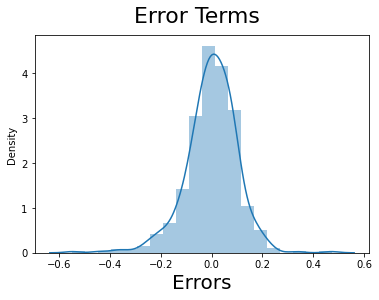

In [123]:
#Checking ASSUMPTION OF NORMALITY:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 22)                  # Plot heading 
plt.xlabel('Errors', fontsize = 20)                         # X-label
plt.show()

In [124]:
#Checking columns
X_train_rfe15.columns

Index([                             'const',
                                       'yr',
                                  'holiday',
                                   'spring',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          5,
                                          6,
                                          8,
                                          9,
                                          7,
                                         10],
      dtype='object')

In [125]:
print(X_train_rfe15.shape)
print(res.shape)

(510, 13)
(510,)


In [126]:
#Scaling the test data

num_vars=['atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [127]:
#Creating x and y sets

y_test = df_test.pop('cnt')
X_test = df_test

In [128]:
X_train_new=X_train_rfe15.drop(['const'], axis=1)

In [129]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [130]:
X_train_rfe15.columns


Index([                             'const',
                                       'yr',
                                  'holiday',
                                   'spring',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          5,
                                          6,
                                          8,
                                          9,
                                          7,
                                         10],
      dtype='object')

In [132]:
#Making predictions on the chosen model

y_pred = lm15.predict(X_test_new)

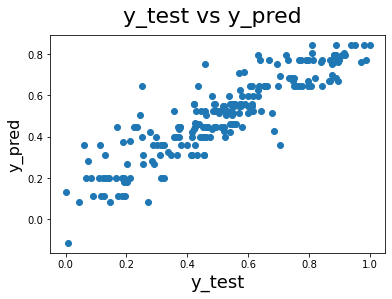

In [134]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=22)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

### We have a model that seems good enough to predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.¶


In [136]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [137]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.10767288514704769

In [138]:
#Calculate the r square for test

r_squared = r2_score(y_test, y_pred)
r_squared

0.7955961097986249

#### R square of our model is 79.1


In [140]:
X_t=X_train_new.iloc[:,0].values


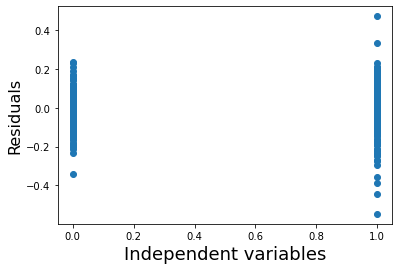

In [141]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

#### When we have time series data (e.g. yearly data), then the regression is likely to suffer from autocorrelation because demand next year will certainly be dependent on demand this year. Hence, error terms in different observations will surely be correlated with each other.

In [143]:
X_train_new.head()

yr  holiday  spring  Light rain_Light snow_Thunderstorm  Mist_cloudy  3  \
653   1        0       0                                   0            0  0   
576   1        0       0                                   0            0  0   
426   1        0       1                                   0            1  1   
728   1        0       1                                   0            0  0   
482   1        0       0                                   0            1  0   

     5  6  8  9  7  10  
653  0  0  0  0  0   1  
576  0  0  0  0  1   0  
426  0  0  0  0  0   0  
728  0  0  0  0  0   0  
482  0  0  0  0  0   0

In [144]:
print(X_train_rfe15.columns)
lm15.summary()

Index([                             'const',
                                       'yr',
                                  'holiday',
                                   'spring',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          5,
                                          6,
                                          8,
                                          9,
                                          7,
                                         10],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     156.7
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.06e-160
Time:                        12:50:58   Log-Likelihood:                 437.66
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     497   BIC:                            -794.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4000      0.011     35.371      0.000       0.378       0.422
yr                                     0.2470      0.009     26.714      0.000       0.229       0.265
holiday                               -0.0754      0.030     -2.550      0.011      -0.134      -0.017
spring                                -0.1987      0.013    -15.081      0.000      -0.225      -0.173
Light rain_Light snow_Thunderstorm    -0.3154      0.028    -11.255      0.000      -0.371      -0.260
Mist_cloudy                           -0.0887      0.010     -8.924      0.000      -0.108      -0.069
3                                      0.0665      0.017      3.993      0.000       0.034       0.099
5                                      0.1236      0.018      6.685      0.000       0.087       0.160
6                                      0.1485      0.019      7.642      0.000       0.110       0.187
8                                      0.1564      0.018      8.877      0.000       0.122       0.191
9                                      0.1958      0.019     10.451      0.000       0.159       0.233
7                                      0.1254      0.019      6.519      0.000       0.088       0.163
10                                     0.1135      0.018      6.180      0.000       0.077       0.150
==============================================================================
Omnibus:                       77.183   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.834
Skew:                          -0.650   Prob(JB):                     2.83e-61
Kurtosis:                       6.381   Cond. No.                         8.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## We can see the demand for bikes depends mainly on below variables:

### yr , holiday ,Spring, Mist_Cloudy, Light rain_Light snow_Thunderstorm,3 ,5 ,6, 8, 9, sunday, 7, 10

## Demands increases in the month of 3, 5, 6, 8 ,9, 7 , 10 and yr

## Demand decreases if it is holiday , Spring, Light rain_Light snow_Thunderstorm, Mist_cloudy, Sunday

## Final recommendations for the company:

### Demand is higher in month of 3, 5 , 6, 8, 9 ,7 and 10